In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/outliersloop/footballyolov8")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ashhadmuhammedkader
Your Kaggle Key: ··········


100%|██████████| 75.9M/75.9M [00:05<00:00, 13.7MB/s]


In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!yolo

In [ ]:
import os
import shutil
import random

!pip install tqdm --upgrade
from tqdm.notebook import tqdm
     

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.5/485.5 KB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.1/189.1 KB 24.7 MB/s eta 0:00:00


In [26]:
from ultralytics import YOLO

# Load a model
# model = YOLO('yolov8n.pt')  # load an official model
model = YOLO('/content/drive/MyDrive/yolov8/training_results/football3/weights/best.pt')  # load a custom model

# Predict with the model
results = model('https://cdn.pixabay.com/photo/2018/02/26/23/57/boy-3184351_960_720.jpg')  # predict on an image

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camer

In [ ]:
type(results)

list

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab.patches import cv2_imshow

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


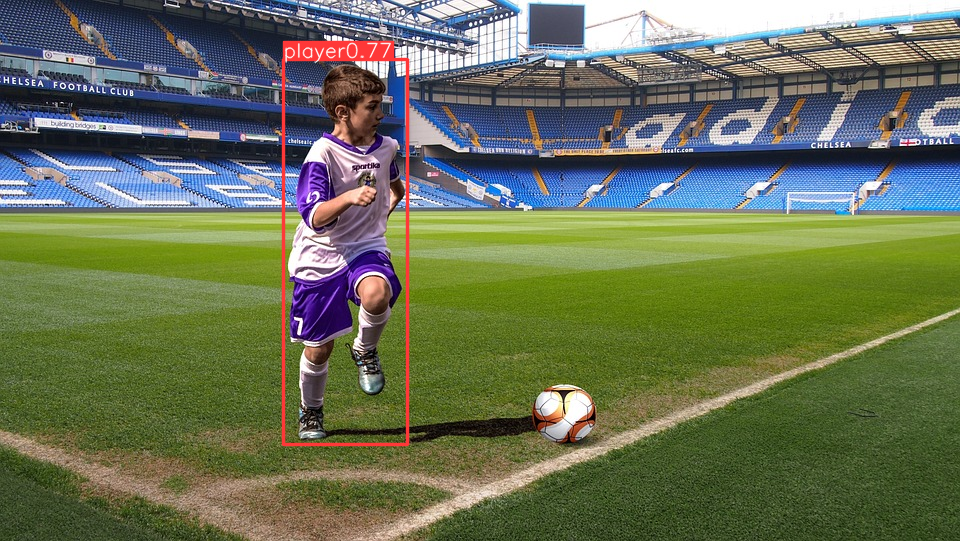

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


In [25]:

res_plotted = results[0].plot()
cv2_imshow( res_plotted)


In [ ]:

train_path_img = "./yolo_data/images/train/"
train_path_label = "./yolo_data/labels/train/"
val_path_img = "./yolo_data/images/val/"
val_path_label = "./yolo_data/labels/val/"
test_path = "./yolo_data/test"

In [ ]:
'''
Split the dataset into train and test and creates the train.txt and test.tx with
the respective path of the images in each folder
'''

def train_test_split(path,neg_path=None, split = 0.2):
    print("------ PROCESS STARTED -------")


    files = list(set([name[:-4] for name in os.listdir(path)])) ## removing duplicate names i.e. counting only number of images
    

    print (f"--- This folder has a total number of {len(files)} images---")
    random.seed(42)
    random.shuffle(files)

    test_size = int(len(files) * split)
    train_size = len(files) - test_size

    ## creating required directories

    os.makedirs(train_path_img, exist_ok = True)
    os.makedirs(train_path_label, exist_ok = True)
    os.makedirs(val_path_img, exist_ok = True)
    os.makedirs(val_path_label, exist_ok = True)

    
    ### ----------- copying images to train folder
    for filex in tqdm(files[:train_size]):
      if filex == 'classes':
          continue
      shutil.copy2(path + filex + '.jpg',f"{train_path_img}/" + filex + '.jpg' )
      shutil.copy2(path + filex + '.txt', f"{train_path_label}/" + filex + '.txt')
        
    

    print(f"------ Training data created with 80% split {len(files[:train_size])} images -------")
    
    if neg_path:
        neg_images = list(set([name[:-4] for name in os.listdir(neg_path)])) ## removing duplicate names i.e. counting only number of images
        for filex in tqdm(neg_images):
            shutil.copy2(neg_path+filex+ ".jpg", f"{train_path_img}/" + filex + '.jpg')
            
        print(f"------ Total  {len(neg_images)} negative images added to the training data -------")
    
        print(f"------ TOTAL Training data created with {len(files[:train_size]) + len(neg_images)} images -------")
    


    ### copytin images to validation folder
    for filex in tqdm(files[train_size:]):
      if filex == 'classes':
          continue
      # print("running")
      shutil.copy2(path + filex + '.jpg', f"{val_path_img}/" + filex + '.jpg' )
      shutil.copy2(path + filex + '.txt', f"{val_path_label}/" + filex + '.txt')

    print(f"------ Testing data created with a total of {len(files[train_size:])} images ----------")
    
    print("------ TASK COMPLETED -------")

## spliting the data into train-test and creating train.txt and test.txt files
# train_test_split('/content/drive/MyDrive/custom_notebooks/yolo_data/')

### for label_tag
train_test_split('/content/footballyolov8/') ### without negative images
# train_test_split('./data/','./negative_images/') ### if you want to feed negative images
     

------ PROCESS STARTED -------
--- This folder has a total number of 66 images---


  0%|          | 0/53 [00:00<?, ?it/s]

------ Training data created with 80% split 53 images -------


  0%|          | 0/13 [00:00<?, ?it/s]

------ Testing data created with a total of 13 images ----------
------ TASK COMPLETED -------


In [ ]:

import ultralytics
ultralytics.checks()
     

Ultralytics YOLOv8.0.55 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.7/78.2 GB disk)


In [ ]:
!yolo


    Arguments received: ['yolo']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of [detect, segment, classify]
                MODE (required) is one of [train, val, predict, export, track]
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with an initial learning_rate of 0.01
        yolo train data=coco128.yaml model=yolov8n.pt epochs=10 lr0=0.01

    2. Predict a YouTube video using a pretrained segmentation model at image size 320:
        yolo predict model=yolov8n-seg.pt source='https://youtu.be/Zgi9g1ksQHc' imgsz=320

    3. Val a pretrained detection model at batch-size 1 and image size 640:
        yolo val model=yolov8n.pt data=coco128.yaml batch=1 imgsz=640

    4. Export a YOLOv8n classification

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/datasets.yaml epochs=10 imgsz=640 batch=8 project=/content/drive/MyDrive/yolov8/training_results name=football 
     


Ultralytics YOLOv8.0.55 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets.yaml, epochs=10, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/yolov8/training_results, name=football, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/yolov8/training_results/football/weights/best.pt conf=0.30 source=/content/drive/MyDrive/yolov8/test_images save=True
     


Ultralytics YOLOv8.0.55 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/2 /content/drive/MyDrive/yolov8/test_images/p1.jpg: 448x640 11 players, 22.6ms
image 2/2 /content/drive/MyDrive/yolov8/test_images/p2.jpg: 320x640 7 players, 15.4ms
Speed: 0.6ms preprocess, 19.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict8


In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/yolov8/training_results/football3/weights/best.pt conf=0.35 source=/content/drive/MyDrive/yolov8/vid save=True
     


Ultralytics YOLOv8.0.55 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (1/356) /content/drive/MyDrive/yolov8/vid/istock-497041742_preview.mp4: 384x640 1 player, 16.1ms
video 1/1 (2/356) /content/drive/MyDrive/yolov8/vid/istock-497041742_preview.mp4: 384x640 1 player, 11.5ms
video 1/1 (3/356) /content/drive/MyDrive/yolov8/vid/istock-497041742_preview.mp4: 384x640 1 player, 11.9ms
video 1/1 (4/356) /content/drive/MyDrive/yolov8/vid/istock-497041742_preview.mp4: 384x640 1 player, 11.5ms
video 1/1 (5/356) /content/drive/MyDrive/yolov8/vid/istock-497041742_preview.mp4: 384x640 1 player, 11.6ms
video 1/1 (6/356) /content/drive/MyDrive/yolov8/vid/istock-497041742_preview.mp4: 384x640 1 player, 11.5ms
video 1/1 (7/356) /content/drive/MyDrive/yolov8/vid/istock-497041742_preview.mp4: 384x640 1 player, 11.5ms
video 1/1 (8/356) /content/drive/MyDrive/yolov8/vid/istock-497041742_preview.mp4: 

In [ ]:
!cp -r /content/runs/detect/predict /content/drive/MyDrive/yolov8/output